<a href="https://colab.research.google.com/github/LauTamayoC/Api_FlatList/blob/master/DeteccionMalaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "lautamayito"
os.environ['KAGGLE_KEY'] = "dad204d51812145e7c59a4f19e65de51"


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 98% 663M/675M [00:09<00:00, 94.7MB/s]
100% 675M/675M [00:09<00:00, 72.0MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('cell-images-for-detecting-malaria.zip', 'r') as zip_ref:
    zip_ref.extractall('Malaria_Cell_Images_Dataset')


In [ ]:
data_dir = 'Malaria_Cell_Images_Dataset'
# Listar los archivos en el directorio
print(os.listdir(data_dir))

['cell_images']


In [ ]:
import cv2
import os
import numpy as np

# Definir la ruta del directorio
data_dir = 'Malaria_Cell_Images_Dataset/cell_images'

# Inicializar listas para almacenar imágenes y etiquetas
images = []
labels = []

# Función para cargar y preprocesar imágenes
def load_images(image_list, label):
    for image_name in image_list:
        image_path = os.path.join(data_dir, label, image_name)
        image = cv2.imread(image_path)
        if image is not None:  # Verificar si la imagen se cargó correctamente
            if not image.size == 0:  # Verificar si la imagen no está vacía
                image = cv2.resize(image, (64, 64))  # Redimensionar todas las imágenes a 64x64 píxeles
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir las imágenes a formato RGB
                images.append(image)
                labels.append(label)
            else:
                print(f"La imagen {image_path} está vacía.")
        else:
            print(f"No se pudo cargar la imagen {image_path}.")


# Cargar imágenes parasitadas
load_images(os.listdir(os.path.join(data_dir, 'Parasitized')), 'Parasitized')

# Cargar imágenes no infectadas
load_images(os.listdir(os.path.join(data_dir, 'Uninfected')), 'Uninfected')

# Convertir las listas de imágenes y etiquetas a matrices NumPy
images = np.array(images)
labels = np.array(labels)

# Verificar las dimensiones de las matrices
print("Dimensiones de las imágenes:", images.shape)
print("Dimensiones de las etiquetas:", labels.shape)



No se pudo cargar la imagen Malaria_Cell_Images_Dataset/cell_images/Parasitized/Thumbs.db.
No se pudo cargar la imagen Malaria_Cell_Images_Dataset/cell_images/Uninfected/Thumbs.db.
Dimensiones de las imágenes: (27558, 64, 64, 3)
Dimensiones de las etiquetas: (27558,)


In [ ]:
print("Ruta de la primera imagen parasitada:", os.path.join(data_dir, 'Parasitized', os.listdir(os.path.join(data_dir, 'Parasitized'))[0]))
print("Ruta de la primera imagen no infectada:", os.path.join(data_dir, 'Uninfected', os.listdir(os.path.join(data_dir, 'Uninfected'))[0]))


Ruta de la primera imagen parasitada: Malaria_Cell_Images_Dataset/cell_images/Parasitized/C183P144NThinF_IMG_20151201_222917_cell_150.png
Ruta de la primera imagen no infectada: Malaria_Cell_Images_Dataset/cell_images/Uninfected/C241NThinF_IMG_20151207_124608_cell_125.png


In [ ]:
# Ruta de la primera imagen parasitada
image_path = os.path.join(data_dir, 'Parasitized', os.listdir(os.path.join(data_dir, 'Parasitized'))[0])

# Intentar cargar la imagen con OpenCV
image = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("No se pudo cargar la imagen.")
else:
    print("La imagen se cargó correctamente.")


La imagen se cargó correctamente.


##DIVISIÓN DEL CONJUNTO DE DATOS

In [ ]:
from sklearn.model_selection import train_test_split

# Convertir etiquetas a valores binarios
labels = np.where(labels == 'Parasitized', 1, 0)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de validación: {X_val.shape}, {y_val.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")


Conjunto de entrenamiento: (16534, 64, 64, 3), (16534,)
Conjunto de validación: (5512, 64, 64, 3), (5512,)
Conjunto de prueba: (5512, 64, 64, 3), (5512,)


##PREPARACION DE LOS DATOS

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


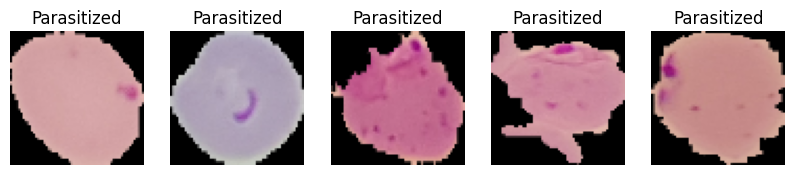

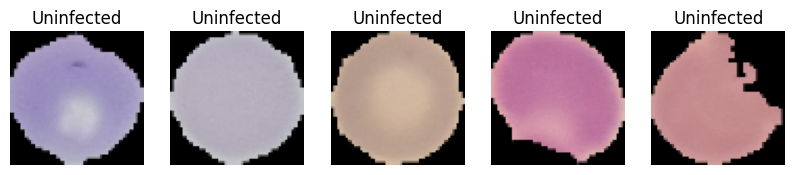

In [ ]:
import matplotlib.pyplot as plt

# Función para mostrar imágenes
def show_images(images, labels, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i])
        plt.title('Parasitized' if labels[i] == 1 else 'Uninfected')
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes parasitadas
parasitized_indices = np.where(labels == 1)[0]
show_images(images[parasitized_indices], labels[parasitized_indices], num=5)

# Mostrar algunas imágenes no infectadas
uninfected_indices = np.where(labels == 0)[0]
show_images(images[uninfected_indices], labels[uninfected_indices], num=5)


##MODELO CON TRANSFER LEARNING

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado VGG16 sin la parte superior (top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Añado capas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout para prevenir sobreajuste
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base del modelo
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32
)
# Evaluar el modelo en el conjunto de prueba independiente
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


Epoch 1/100
517/517 [==============================] - 996s 2s/step - loss: 0.2865 - accuracy: 0.8850 - val_loss: 0.2509 - val_accuracy: 0.9002
Epoch 2/100
517/517 [==============================] - 960s 2s/step - loss: 0.2525 - accuracy: 0.9002 - val_loss: 0.2289 - val_accuracy: 0.9084
Epoch 3/100
517/517 [==============================] - 967s 2s/step - loss: 0.2338 - accuracy: 0.9091 - val_loss: 0.2212 - val_accuracy: 0.9193
Epoch 4/100
517/517 [==============================] - 950s 2s/step - loss: 0.2220 - accuracy: 0.9147 - val_loss: 0.2095 - val_accuracy: 0.9204
Epoch 5/100
517/517 [==============================] - 954s 2s/step - loss: 0.2148 - accuracy: 0.9168 - val_loss: 0.2019 - val_accuracy: 0.9234
Epoch 6/100
517/517 [==============================] - 944s 2s/step - loss: 0.2072 - accuracy: 0.9206 - val_loss: 0.1978 - val_accuracy: 0.9269
Epoch 7/100
517/517 [==============================] - 951s 2s/step - loss: 0.2015 - accuracy: 0.9223 - val_loss: 0.1950 - val_accuracy:

##ENTRENAMIENTO DEL MODELO

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks para guardar el mejor modelo y detener el entrenamiento temprano si no hay mejoras
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


Epoch 1/100
516/517 [============================>.] - ETA: 0s - loss: 5.2660e-20 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.h5
517/517 [==============================] - 16s 31ms/step - loss: 5.2590e-20 - accuracy: 1.0000 - val_loss: 1.5177e-24 - val_accuracy: 1.0000
Epoch 2/100
516/517 [============================>.] - ETA: 0s - loss: 2.3506e-20 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
517/517 [==============================] - 15s 29ms/step - loss: 2.3476e-20 - accuracy: 1.0000 - val_loss: 1.5177e-24 - val_accuracy: 1.0000
Epoch 3/100
515/517 [============================>.] - ETA: 0s - loss: 3.2831e-20 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
517/517 [==============================] - 15s 28ms/step - loss: 3.2726e-20 - accuracy: 1.0000 - val_loss: 1.5177e-24 - val_accuracy: 1.0000
Epoch 4/100
516/517 [============================>.] - ETA: 0s - loss: 1.5195e-20 - accur

##Tratando de eliminar el sobreajuste

In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Definir la ruta del directorio
data_dir = 'Malaria_Cell_Images_Dataset/cell_images'

# Inicializar listas para almacenar imágenes y etiquetas
images = []
labels = []

# Función para cargar y preprocesar imágenes
def load_images(image_list, label):
    for image_name in image_list:
        image_path = os.path.join(data_dir, label, image_name)
        image = cv2.imread(image_path)
        if image is not None:  # Verificar si la imagen se cargó correctamente
            if not image.size == 0:  # Verificar si la imagen no está vacía
                image = cv2.resize(image, (64, 64))  # Redimensionar todas las imágenes a 64x64 píxeles
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir las imágenes a formato RGB
                images.append(image)
                labels.append(1 if label == 'Parasitized' else 0)
            else:
                print(f"La imagen {image_path} está vacía.")
        else:
            print(f"No se pudo cargar la imagen {image_path}.")

# Cargar imágenes parasitadas y no infectadas
load_images(os.listdir(os.path.join(data_dir, 'Parasitized')), 'Parasitized')
load_images(os.listdir(os.path.join(data_dir, 'Uninfected')), 'Uninfected')

# Convertir las listas de imágenes y etiquetas a matrices NumPy
images = np.array(images)
labels = np.array(labels)

# Normalización de las imágenes
images = images / 255.0

# División del conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# Verificar las dimensiones de las matrices
print("Dimensiones de las imágenes de entrenamiento:", X_train.shape)
print("Dimensiones de las etiquetas de entrenamiento:", y_train.shape)
print("Dimensiones de las imágenes de validación:", X_val.shape)
print("Dimensiones de las etiquetas de validación:", y_val.shape)
print("Dimensiones de las imágenes de prueba:", X_test.shape)
print("Dimensiones de las etiquetas de prueba:", y_test.shape)



No se pudo cargar la imagen Malaria_Cell_Images_Dataset/cell_images/Parasitized/Thumbs.db.
No se pudo cargar la imagen Malaria_Cell_Images_Dataset/cell_images/Uninfected/Thumbs.db.
Dimensiones de las imágenes de entrenamiento: (19290, 64, 64, 3)
Dimensiones de las etiquetas de entrenamiento: (19290,)
Dimensiones de las imágenes de validación: (5539, 64, 64, 3)
Dimensiones de las etiquetas de validación: (5539,)
Dimensiones de las imágenes de prueba: (2729, 64, 64, 3)
Dimensiones de las etiquetas de prueba: (2729,)


In [ ]:
##MODELO TRANSFER
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado VGG16 sin la parte superior (top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Añadir capas personalizadas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Añadir Dropout para prevenir sobreajuste
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base del modelo
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
##REGULACION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Generador de datos con aumento
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Callbacks para guardar el mejor modelo y detener el entrenamiento temprano si no hay mejoras
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Entrenar el modelo
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/100
603/603 [==============================] - ETA: 0s - loss: 0.4366 - accuracy: 0.8011
Epoch 1: val_accuracy improved from -inf to 0.86712, saving model to best_model.h5
603/603 [==============================] - 42s 60ms/step - loss: 0.4366 - accuracy: 0.8011 - val_loss: 0.3167 - val_accuracy: 0.8671


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
602/603 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8537
Epoch 2: val_accuracy improved from 0.86712 to 0.89782, saving model to best_model.h5
603/603 [==============================] - 32s 53ms/step - loss: 0.3466 - accuracy: 0.8536 - val_loss: 0.2769 - val_accuracy: 0.8978
Epoch 3/100
603/603 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.8684
Epoch 3: val_accuracy improved from 0.89782 to 0.90088, saving model to best_model.h5
603/603 [==============================] - 33s 55ms/step - loss: 0.3219 - accuracy: 0.8684 - val_loss: 0.2604 - val_accuracy: 0.9009
Epoch 4/100
603/603 [==============================] - ETA: 0s - loss: 0.3082 - accuracy: 0.8741
Epoch 4: val_accuracy improved from 0.90088 to 0.90955, saving model to best_model.h5
603/603 [==============================] - 34s 56ms/step - loss: 0.3082 - accuracy: 0.8741 - val_loss: 0.2668 - val_accuracy: 0.9096
Epoch 5/100
603/603 [==============================]

In [ ]:
##FINE TUNING
# Descongelar algunas capas del modelo base
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Compilar de nuevo el modelo
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar de nuevo el modelo
history_fine = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/50
603/603 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9043
Epoch 1: val_accuracy improved from 0.92833 to 0.94277, saving model to best_model.h5
603/603 [==============================] - 39s 61ms/step - loss: 0.2425 - accuracy: 0.9043 - val_loss: 0.1807 - val_accuracy: 0.9428
Epoch 2/50
602/603 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9155
Epoch 2: val_accuracy improved from 0.94277 to 0.94530, saving model to best_model.h5
603/603 [==============================] - 34s 56ms/step - loss: 0.2204 - accuracy: 0.9156 - val_loss: 0.1573 - val_accuracy: 0.9453
Epoch 3/50
603/603 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9219
Epoch 3: val_accuracy improved from 0.94530 to 0.94746, saving model to best_model.h5
603/603 [==============================] - 37s 61ms/step - loss: 0.2075 - accuracy: 0.9219 - val_loss: 0.1583 - val_accuracy: 0.9475
Epoch 4/50
603/603 [==============================] - E

##IMAGENES RETINA

In [ ]:
import kaggle

# Descargar el dataset
kaggle.api.dataset_download_files('paultimothymooney/kermany2018', path='path/to/dataset', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018


KeyboardInterrupt: 

##PRE PROCESAMIENTO

In [ ]:
import os
import kaggle
import zipfile

# Especifica la ruta donde se guardará el dataset
dataset_path = '/content/path/to/dataset'
zip_path = os.path.join(dataset_path, 'kermany2018.zip')

# Descargar el dataset
kaggle.api.dataset_download_files('paultimothymooney/kermany2018', path=dataset_path, unzip=False)

# Descomprimir el archivo si no se descomprimió automáticamente
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# Verificar la estructura del directorio
base_dir = os.path.join(dataset_path, '/content/path/to/dataset/OCT2017 ')
train_dir = os.path.join(base_dir, '/content/path/to/dataset/OCT2017 /train')
val_dir = os.path.join(base_dir, '/content/path/to/dataset/OCT2017 /val')
test_dir = os.path.join(base_dir, '/content/path/to/dataset/OCT2017 /test')

print("Directorio de entrenamiento:", os.listdir(train_dir))
print("Directorio de validación:", os.listdir(val_dir))
print("Directorio de prueba:", os.listdir(test_dir))

# Inicializar listas para almacenar imágenes y etiquetas
images = []
labels = []

# Función para cargar y preprocesar imágenes
def load_images(image_list, label, dir_path):
    for image_name in image_list:
        image_path = os.path.join(dir_path, label, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            if not image.size == 0:
                image = cv2.resize(image, (64, 64))  # Redimensionar todas las imágenes a 64x64 píxeles
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir las imágenes a formato RGB
                images.append(image)
                labels.append(label)
            else:
                print(f"La imagen {image_path} está vacía.")
        else:
            print(f"No se pudo cargar la imagen {image_path}.")

# Cargar imágenes de entrenamiento, validación y prueba
for label in ['CNV', 'DME', 'DRUSEN', 'NORMAL']:
    load_images(os.listdir(os.path.join(train_dir, label)), label, train_dir)
    load_images(os.listdir(os.path.join(val_dir, label)), label, val_dir)
    load_images(os.listdir(os.path.join(test_dir, label)), label, test_dir)

# Convertir las listas de imágenes y etiquetas a matrices NumPy
images = np.array(images)
labels = np.array(labels)

# Normalización de las imágenes
images = images / 255.0

# División del conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# Verificar las dimensiones de las matrices
print("Dimensiones de las imágenes de entrenamiento:", X_train.shape)
print("Dimensiones de las etiquetas de entrenamiento:", y_train.shape)
print("Dimensiones de las imágenes de validación:", X_val.shape)
print("Dimensiones de las etiquetas de validación:", y_val.shape)
print("Dimensiones de las imágenes de prueba:", X_test.shape)
print("Dimensiones de las etiquetas de prueba:", y_test.shape)



OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

##TRANSFER

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado VGG16 sin la parte superior (top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Añadir capas personalizadas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Añadir Dropout para prevenir sobreajuste
predictions = Dense(4, activation='softmax')(x)  # 4 clases: CNV, DME, DRUSEN, NORMAL

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base del modelo
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

NameError: name 'images' is not defined

##ENTRENAMIENTO

In [ ]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Guardar el modelo entrenado
model.save('oct_model.h5')


NameError: name 'X_train' is not defined